# Starting with dowhy for Causality inference analysis


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import re
# from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt


In [2]:
CSV_PATH = "../data.csv"

In [3]:
def read_proccessed_data(csv_path):
    try:    
        df = pd.read_csv(csv_path)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")

In [4]:
df = read_proccessed_data(CSV_PATH)

file read as csv


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
from dowhy import CausalModel
import dowhy.datasets as ds

In [25]:
d = ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

In [26]:
model = CausalModel(
    data=d["df"],
    treatment=d["treatment_name"],
    outcome=d["outcome_name"],
    graph=d["gml_graph"])

In [27]:
ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

{'df':             W0        W1        W2        W3        W4     v0         y
 0    -0.275124  1.261659 -1.851442 -1.978089  0.648040  False  1.979966
 1    -0.546887  1.405180 -0.914574 -0.755962 -0.968970   True  3.978889
 2     1.320408 -2.999561  0.698836  0.743750  1.556208   True  5.194173
 3     1.861193 -1.541736  0.051389 -0.501969 -2.070488   True -1.690634
 4     0.071566 -1.315264 -0.290346 -0.331161  1.578146   True  6.377610
 ...        ...       ...       ...       ...       ...    ...       ...
 9995 -1.877574  0.524182 -1.601744  0.122329 -0.249682  False -1.439396
 9996 -0.961589  0.588858  0.770841 -1.050679  0.403008   True  5.884720
 9997 -1.459889 -0.469676  0.154438 -0.357553  1.236275  False  0.972473
 9998 -2.278673 -0.659625 -1.225022 -1.144783  0.912471  False -1.584348
 9999 -1.980163  0.077348 -1.934506 -1.461995 -0.668171  False -4.359623
 
 [10000 rows x 7 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'y',
 'common_causes_names': ['W0', 'W1', 'W2

In [28]:
d["common_causes_names"] = ["area_mean", "concavity_mean", "area_se", "concavity_worst",
       "symmetry_worst"]

In [38]:
d["dot_graph"]

'digraph { U[label="Unobserved Confounders"]; U->y;v0->y;U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;}'

In [66]:
dir(d["dot_graph"])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [52]:
import networkx as nx

In [56]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)
G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)
G = nx.DiGraph(day="Friday")


In [63]:
G.graph

{'day': 'Friday'}

In [58]:
G.add_node(1, time="5pm")
G.add_nodes_from([3], time="2pm")
G.nodes[1]

G.nodes[1]["room"] = 714
del G.nodes[1]["room"]  # remove attribute
list(G.nodes(data=True))

[(1, {'time': '5pm'}), (3, {'time': '2pm'})]

In [59]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color="red")
G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])
G[1][2]["weight"] = 4.7
G.edges[1, 2]["weight"] = 4

In [61]:
G.graph

{'day': 'Friday'}

In [36]:
model = CausalModel(
    data = df,
    treatment = treatment_name,
    outcome = outcome_name,
    graph = d["gml_graph"]
)

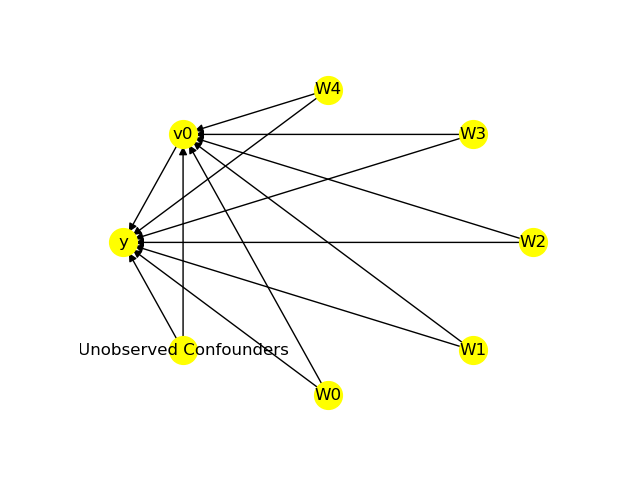

In [37]:
model.view_model(layout = "dot")
from IPython.display import Image, display
display(Image(filename = "causal_model.png"))

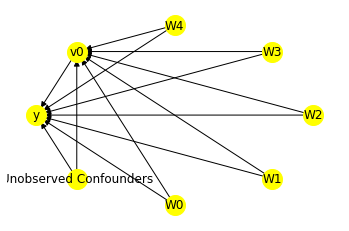

In [14]:
model.view_model(layout = "dot")

ModuleNotFoundError: No module named 'ipython'

In [32]:
!pip install IPython

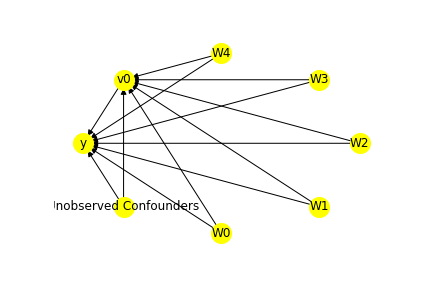

In [47]:
display(Image(filename = "causal_model.png"))

In [48]:
identified_estimand = model.identify_effect()
print(identified_estimand)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                  
─────(Expectation(y))
d[v₀]                
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,,U) = P(y|v0,)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



In [49]:
estimate = model.estimate_effect(identified_estimand,method_name = "backdoor.linear_regression")

KeyError: "None of [Index(['v0'], dtype='object')] are in the [columns]"

In [51]:
d["treatment_name"],

(['v0'],)

In [52]:
d["outcome_name"],

('y',)

In [53]:
d["gml_graph"]

'graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "v0" label "v0"]edge[source "Unobserved Confounders" target "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"] edge[ source "W2" target "v0"] edge[ source "W3" target "v0"] edge[ source "W4" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"] edge[ source "W2" target "y"] edge[ source "W3" target "y"] edge[ source "W4" target "y"]]'

In [54]:
ds.linear_dataset(beta=5,
    num_common_causes=5,
    num_instruments = 0,
    num_samples=10000,
    treatment_is_binary=True)

{'df':             W0        W1        W2        W3        W4     v0         y
 0     0.592719  1.147668 -1.428245 -0.779740  0.480400  False -0.651857
 1     0.563875 -0.268635  0.194788 -0.201259  0.953345   True  4.401147
 2     1.425879 -0.276493  0.109058 -3.281424  0.112673  False -6.853664
 3    -0.747280 -1.051617  1.031021 -0.409387  0.839074  False -1.748882
 4    -1.008524  0.651541 -0.867160 -2.515052  2.084695  False -4.485655
 ...        ...       ...       ...       ...       ...    ...       ...
 9995 -1.398303  3.122374 -0.949994 -1.460479  0.346022  False  1.272263
 9996 -0.319507  2.834405  1.555401 -1.092235  0.100099  False  3.282058
 9997  2.634543  1.003346  0.285017  0.757903  0.806730   True  8.458195
 9998  1.736977  2.351938  0.678294 -0.160941  2.011505   True  9.028913
 9999 -0.708639 -2.747071  1.057305  0.133040  2.271360   True  1.793347
 
 [10000 rows x 7 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'y',
 'common_causes_names': ['W0', 'W1', 'W2

In [55]:
d["common_causes_names"] = ['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst']

In [100]:
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [101]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


C:\Users\Betelhem\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Betelhem\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
